In [1]:
!pip install ta

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import ta

In [3]:
gold = pd.read_csv('/content/drive/MyDrive/최종프로젝트/금/XAU_USD_금_일간.csv')
philadelphia_gold = pd.read_csv('/content/drive/MyDrive/최종프로젝트/금/Philadelphia Gold_일간.csv')
nem = pd.read_csv('/content/drive/MyDrive/최종프로젝트/금/NEM_일간.csv')
dollar = pd.read_csv('/content/drive/MyDrive/최종프로젝트/금/달러_지수_일간.csv')
nasdaq = pd.read_csv('/content/drive/MyDrive/최종프로젝트/금/나스닥종합지수 과거 데이터.csv')
silver = pd.read_csv('/content/drive/MyDrive/최종프로젝트/금/은_선물_과거_데이터.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#,표 없애기
gold['종가']=gold['종가'].str.replace(',','')
nasdaq['종가'] = nasdaq['종가'].str.replace(',','')

In [6]:
gold['날짜'] = pd.to_datetime(gold['날짜'])
philadelphia_gold['날짜'] = pd.to_datetime(philadelphia_gold['날짜'])
nem['날짜'] = pd.to_datetime(nem['날짜'])
dollar['날짜'] = pd.to_datetime(dollar['날짜'])
nasdaq['날짜'] = pd.to_datetime(nasdaq['날짜'])
silver['날짜'] = pd.to_datetime(silver['날짜'])

In [7]:
gold_c = gold
#gold_c = gold[['날짜','종가']]
philadelphia_gold_c = philadelphia_gold[['날짜','종가']]
nem_c = nem[['날짜','종가']]
dollar_c = dollar[['날짜','종가']]
nasdaq_c = nasdaq[['날짜','종가']]
silver_c = silver[['날짜','종가']]

In [8]:
gold_c

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2022-12-30,1824.40,"1,815.14","1,826.73","1,809.84",NaN,0.52%
1,2022-12-29,1814.89,"1,804.16","1,820.52","1,802.02",NaN,0.60%
2,2022-12-28,1804.09,"1,814.00","1,815.18","1,796.56",NaN,-0.54%
3,2022-12-27,1813.93,"1,796.67","1,833.39","1,796.20",NaN,0.91%
4,2022-12-26,1797.61,"1,798.57","1,798.78","1,798.04",NaN,-0.02%
...,...,...,...,...,...,...,...
1557,2017-01-06,1172.81,"1,180.38","1,181.49","1,170.37",NaN,-0.65%
1558,2017-01-05,1180.48,"1,163.67","1,184.99","1,162.38",NaN,1.43%
1559,2017-01-04,1163.80,"1,159.28","1,168.23","1,156.35",NaN,0.42%
1560,2017-01-03,1158.91,"1,150.80","1,163.61","1,145.77",NaN,0.73%


In [9]:
gold_c = pd.merge(gold_c,philadelphia_gold_c, how='left',on='날짜', suffixes=('_gold', '_PH_gold'))

In [10]:
gold_c = pd.merge(gold_c, nem_c, how='left', on='날짜')
gold_c = gold_c.rename(columns={'종가':'종가_nem'})
gold_c = pd.merge(gold_c, dollar_c, how='left', on='날짜')
gold_c = gold_c.rename(columns={'종가':'종가_dollar'})
gold_c = pd.merge(gold_c, nasdaq_c, how='left', on='날짜')
gold_c = gold_c.rename(columns={'종가':'종가_nasdaq'})
gold_c = pd.merge(gold_c, silver_c, how='left', on='날짜')
gold_c = gold_c.rename(columns={'종가':'종가_silver'})

In [11]:
merge_outer = gold_c

In [12]:
# merge_outer[merge_outer['종가_dax'].isnull()]

In [13]:
# merge_outer['종가_dax'].fillna(method='ffill', inplace=True)
# merge_outer['시가_dax'].fillna(method='ffill', inplace=True)
# merge_outer['고가_dax'].fillna(method='ffill', inplace=True)
# merge_outer['저가_dax'].fillna(method='ffill', inplace=True)
# merge_outer['거래량_dax'].fillna(method='ffill', inplace=True)
# merge_outer['변동 %_dax'].fillna(method='ffill', inplace=True)

In [14]:
merge_outer

,날짜,종가_gold,시가,고가,저가,거래량,변동 %,종가_PH_gold,종가_nem,종가_dollar,종가_nasdaq,종가_silver
0,2022-12-30,1824.40,"1,815.14","1,826.73","1,809.84",NaN,0.52%,120.86,47.20,103.52,10466.48,24.040
1,2022-12-29,1814.89,"1,804.16","1,820.52","1,802.02",NaN,0.60%,121.62,47.36,103.84,10478.09,24.250
2,2022-12-28,1804.09,"1,814.00","1,815.18","1,796.56",NaN,-0.54%,121.07,47.37,104.46,10213.29,23.840
3,2022-12-27,1813.93,"1,796.67","1,833.39","1,796.20",NaN,0.91%,124.85,48.75,104.18,10353.23,24.217
4,2022-12-26,1797.61,"1,798.57","1,798.78","1,798.04",NaN,-0.02%,NaN,NaN,NaN,NaN,24.055
...,...,...,...,...,...,...,...,...,...,...,...,...
1557,2017-01-06,1172.81,"1,180.38","1,181.49","1,170.37",NaN,-0.65%,85.31,34.56,102.22,5521.06,16.519
1558,2017-01-05,1180.48,"1,163.67","1,184.99","1,162.38",NaN,1.43%,87.93,35.68,101.52,5487.94,16.637
1559,2017-01-04,1163.80,"1,159.28","1,168.23","1,156.35",NaN,0.42%,83.39,34.11,102.70,5477.01,16.552
1560,2017-01-03,1158.91,"1,150.80","1,163.61","1,145.77",NaN,0.73%,82.01,33.79,103.21,5429.08,16.409


In [15]:
merge_outer = merge_outer.astype({'종가_gold':'float','종가_PH_gold':'float','종가_nem':'float','종가_dollar':'float','종가_nasdaq':'float','종가_silver':'float'})

In [16]:
merge_outer = merge_outer.sort_values('날짜')

In [17]:
merge_outer = merge_outer.reset_index(drop=True)

In [18]:
merge_outer[['종가_gold','종가_PH_gold','종가_nem','종가_dollar','종가_nasdaq','종가_silver']].corr()

,종가_gold,종가_PH_gold,종가_nem,종가_dollar,종가_nasdaq,종가_silver
종가_gold,1.000000,0.936564,0.930228,0.059376,0.873749,0.855884
종가_PH_gold,0.936564,1.000000,0.955511,-0.129989,0.846184,0.941383
종가_nem,0.930228,0.955511,1.000000,-0.102848,0.819753,0.847418
종가_dollar,0.059376,-0.129989,-0.102848,1.000000,-0.051885,-0.200104
종가_nasdaq,0.873749,0.846184,0.819753,-0.051885,1.000000,0.844300
종가_silver,0.855884,0.941383,0.847418,-0.200104,0.844300,1.000000


In [19]:
merge_outer.isnull().sum()

날짜               0
종가_gold          0
시가               0
고가               0
저가               0
거래량           1562
변동 %             0
종가_PH_gold      52
종가_nem          52
종가_dollar        2
종가_nasdaq       52
종가_silver       29
dtype: int64

In [20]:
merge_outer.drop('거래량', axis=1, inplace=True)
merge_outer

,날짜,종가_gold,시가,고가,저가,변동 %,종가_PH_gold,종가_nem,종가_dollar,종가_nasdaq,종가_silver
0,2017-01-02,1150.52,"1,150.55","1,152.66","1,149.66",-0.12%,NaN,NaN,102.83,NaN,NaN
1,2017-01-03,1158.91,"1,150.80","1,163.61","1,145.77",0.73%,82.01,33.79,103.21,5429.08,16.409
2,2017-01-04,1163.80,"1,159.28","1,168.23","1,156.35",0.42%,83.39,34.11,102.70,5477.01,16.552
3,2017-01-05,1180.48,"1,163.67","1,184.99","1,162.38",1.43%,87.93,35.68,101.52,5487.94,16.637
4,2017-01-06,1172.81,"1,180.38","1,181.49","1,170.37",-0.65%,85.31,34.56,102.22,5521.06,16.519
...,...,...,...,...,...,...,...,...,...,...,...
1557,2022-12-26,1797.61,"1,798.57","1,798.78","1,798.04",-0.02%,NaN,NaN,NaN,NaN,24.055
1558,2022-12-27,1813.93,"1,796.67","1,833.39","1,796.20",0.91%,124.85,48.75,104.18,10353.23,24.217
1559,2022-12-28,1804.09,"1,814.00","1,815.18","1,796.56",-0.54%,121.07,47.37,104.46,10213.29,23.840
1560,2022-12-29,1814.89,"1,804.16","1,820.52","1,802.02",0.60%,121.62,47.36,103.84,10478.09,24.250


In [21]:
merge_outer.fillna(method='bfill', inplace=True)


In [22]:
merge_outer.isnull().sum()

날짜            0
종가_gold       0
시가            0
고가            0
저가            0
변동 %          0
종가_PH_gold    0
종가_nem        0
종가_dollar     0
종가_nasdaq     0
종가_silver     0
dtype: int64

In [23]:
merge_outer

,날짜,종가_gold,시가,고가,저가,변동 %,종가_PH_gold,종가_nem,종가_dollar,종가_nasdaq,종가_silver
0,2017-01-02,1150.52,"1,150.55","1,152.66","1,149.66",-0.12%,82.01,33.79,102.83,5429.08,16.409
1,2017-01-03,1158.91,"1,150.80","1,163.61","1,145.77",0.73%,82.01,33.79,103.21,5429.08,16.409
2,2017-01-04,1163.80,"1,159.28","1,168.23","1,156.35",0.42%,83.39,34.11,102.70,5477.01,16.552
3,2017-01-05,1180.48,"1,163.67","1,184.99","1,162.38",1.43%,87.93,35.68,101.52,5487.94,16.637
4,2017-01-06,1172.81,"1,180.38","1,181.49","1,170.37",-0.65%,85.31,34.56,102.22,5521.06,16.519
...,...,...,...,...,...,...,...,...,...,...,...
1557,2022-12-26,1797.61,"1,798.57","1,798.78","1,798.04",-0.02%,124.85,48.75,104.18,10353.23,24.055
1558,2022-12-27,1813.93,"1,796.67","1,833.39","1,796.20",0.91%,124.85,48.75,104.18,10353.23,24.217
1559,2022-12-28,1804.09,"1,814.00","1,815.18","1,796.56",-0.54%,121.07,47.37,104.46,10213.29,23.840
1560,2022-12-29,1814.89,"1,804.16","1,820.52","1,802.02",0.60%,121.62,47.36,103.84,10478.09,24.250


In [24]:
!pip install ta
import ta

In [25]:
merge_outer['고가']=merge_outer['고가'].str.replace(',','')
merge_outer['저가']=merge_outer['저가'].str.replace(',','')

In [26]:
merge_outer = merge_outer.astype({'고가':'float','저가':'float'})

In [27]:
H, L, C= merge_outer['고가'], merge_outer['저가'], merge_outer['종가_gold']

In [28]:
merge_outer['ATR'] = ta.volatility.average_true_range(high=H, low=L, close=C, fillna=True)

In [29]:
merge_outer['Parabolic SAR'] = ta.trend.psar_down(high=H, low=L, close=C, fillna=True)

In [30]:
merge_outer['MACD'] = ta.trend.macd(close=C, fillna=True)

In [31]:
merge_outer['SMA'] = ta.trend.sma_indicator(close=C, fillna=True)

In [32]:
merge_outer['EMA'] = ta.trend.ema_indicator(close=C, fillna=True)

In [33]:
merge_outer['RSI'] = ta.momentum.rsi(close=C, fillna=True)

In [34]:
merge_outer

,날짜,종가_gold,시가,고가,저가,변동 %,종가_PH_gold,종가_nem,종가_dollar,종가_nasdaq,종가_silver,ATR,Parabolic SAR,MACD,SMA,EMA,RSI
0,2017-01-02,1150.52,"1,150.55",1152.66,1149.66,-0.12%,82.01,33.79,102.83,5429.08,16.409,0.000000,1152.660000,0.000000,1150.520000,1150.520000,100.000000
1,2017-01-03,1158.91,"1,150.80",1163.61,1145.77,0.73%,82.01,33.79,103.21,5429.08,16.409,0.000000,1152.660000,0.669288,1154.715000,1151.810769,100.000000
2,2017-01-04,1163.80,"1,159.28",1168.23,1156.35,0.42%,83.39,34.11,102.70,5477.01,16.552,0.000000,1152.660000,1.576117,1157.743333,1153.655266,100.000000
3,2017-01-05,1180.48,"1,163.67",1184.99,1162.38,1.43%,87.93,35.68,101.52,5487.94,16.637,0.000000,1152.660000,3.599232,1163.427500,1157.782148,100.000000
4,2017-01-06,1172.81,"1,180.38",1181.49,1170.37,-0.65%,85.31,34.56,102.22,5521.06,16.519,0.000000,1152.660000,4.531425,1165.304000,1160.094126,77.502352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,2022-12-26,1797.61,"1,798.57",1798.78,1798.04,-0.02%,124.85,48.75,104.18,10353.23,24.055,23.102130,1781.066092,16.332185,1797.617500,1794.985612,55.981040
1558,2022-12-27,1813.93,"1,796.67",1833.39,1796.20,0.91%,124.85,48.75,104.18,10353.23,24.217,24.108407,1781.066092,16.633627,1799.059167,1797.900134,59.862261
1559,2022-12-28,1804.09,"1,814.00",1815.18,1796.56,-0.54%,121.07,47.37,104.46,10213.29,23.840,23.716378,1781.066092,15.895285,1800.970833,1798.852421,56.620634
1560,2022-12-29,1814.89,"1,804.16",1820.52,1802.02,0.60%,121.62,47.36,103.84,10478.09,24.250,23.343779,1781.066092,15.997207,1801.354167,1801.319741,59.230164


In [35]:
merge_outer.drop('종가_dollar', axis=1, inplace=True)
merge_outer

,날짜,종가_gold,시가,고가,저가,변동 %,종가_PH_gold,종가_nem,종가_nasdaq,종가_silver,ATR,Parabolic SAR,MACD,SMA,EMA,RSI
0,2017-01-02,1150.52,"1,150.55",1152.66,1149.66,-0.12%,82.01,33.79,5429.08,16.409,0.000000,1152.660000,0.000000,1150.520000,1150.520000,100.000000
1,2017-01-03,1158.91,"1,150.80",1163.61,1145.77,0.73%,82.01,33.79,5429.08,16.409,0.000000,1152.660000,0.669288,1154.715000,1151.810769,100.000000
2,2017-01-04,1163.80,"1,159.28",1168.23,1156.35,0.42%,83.39,34.11,5477.01,16.552,0.000000,1152.660000,1.576117,1157.743333,1153.655266,100.000000
3,2017-01-05,1180.48,"1,163.67",1184.99,1162.38,1.43%,87.93,35.68,5487.94,16.637,0.000000,1152.660000,3.599232,1163.427500,1157.782148,100.000000
4,2017-01-06,1172.81,"1,180.38",1181.49,1170.37,-0.65%,85.31,34.56,5521.06,16.519,0.000000,1152.660000,4.531425,1165.304000,1160.094126,77.502352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,2022-12-26,1797.61,"1,798.57",1798.78,1798.04,-0.02%,124.85,48.75,10353.23,24.055,23.102130,1781.066092,16.332185,1797.617500,1794.985612,55.981040
1558,2022-12-27,1813.93,"1,796.67",1833.39,1796.20,0.91%,124.85,48.75,10353.23,24.217,24.108407,1781.066092,16.633627,1799.059167,1797.900134,59.862261
1559,2022-12-28,1804.09,"1,814.00",1815.18,1796.56,-0.54%,121.07,47.37,10213.29,23.840,23.716378,1781.066092,15.895285,1800.970833,1798.852421,56.620634
1560,2022-12-29,1814.89,"1,804.16",1820.52,1802.02,0.60%,121.62,47.36,10478.09,24.250,23.343779,1781.066092,15.997207,1801.354167,1801.319741,59.230164


In [36]:
merge_outer['변동 %']=merge_outer['변동 %'].str.replace('%','')

In [37]:
merge_outer

,날짜,종가_gold,시가,고가,저가,변동 %,종가_PH_gold,종가_nem,종가_nasdaq,종가_silver,ATR,Parabolic SAR,MACD,SMA,EMA,RSI
0,2017-01-02,1150.52,"1,150.55",1152.66,1149.66,-0.12,82.01,33.79,5429.08,16.409,0.000000,1152.660000,0.000000,1150.520000,1150.520000,100.000000
1,2017-01-03,1158.91,"1,150.80",1163.61,1145.77,0.73,82.01,33.79,5429.08,16.409,0.000000,1152.660000,0.669288,1154.715000,1151.810769,100.000000
2,2017-01-04,1163.80,"1,159.28",1168.23,1156.35,0.42,83.39,34.11,5477.01,16.552,0.000000,1152.660000,1.576117,1157.743333,1153.655266,100.000000
3,2017-01-05,1180.48,"1,163.67",1184.99,1162.38,1.43,87.93,35.68,5487.94,16.637,0.000000,1152.660000,3.599232,1163.427500,1157.782148,100.000000
4,2017-01-06,1172.81,"1,180.38",1181.49,1170.37,-0.65,85.31,34.56,5521.06,16.519,0.000000,1152.660000,4.531425,1165.304000,1160.094126,77.502352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,2022-12-26,1797.61,"1,798.57",1798.78,1798.04,-0.02,124.85,48.75,10353.23,24.055,23.102130,1781.066092,16.332185,1797.617500,1794.985612,55.981040
1558,2022-12-27,1813.93,"1,796.67",1833.39,1796.20,0.91,124.85,48.75,10353.23,24.217,24.108407,1781.066092,16.633627,1799.059167,1797.900134,59.862261
1559,2022-12-28,1804.09,"1,814.00",1815.18,1796.56,-0.54,121.07,47.37,10213.29,23.840,23.716378,1781.066092,15.895285,1800.970833,1798.852421,56.620634
1560,2022-12-29,1814.89,"1,804.16",1820.52,1802.02,0.60,121.62,47.36,10478.09,24.250,23.343779,1781.066092,15.997207,1801.354167,1801.319741,59.230164


In [38]:
merge_outer.info()
merge_outer['시가']=merge_outer['시가'].str.replace(',','')
merge_outer['변동 %']=merge_outer['변동 %'].str.replace(' %','')
merge_outer = merge_outer.astype({'시가':'float','변동 %':'float'})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   날짜             1562 non-null   datetime64[ns]
 1   종가_gold        1562 non-null   float64       
 2   시가             1562 non-null   object        
 3   고가             1562 non-null   float64       
 4   저가             1562 non-null   float64       
 5   변동 %           1562 non-null   object        
 6   종가_PH_gold     1562 non-null   float64       
 7   종가_nem         1562 non-null   float64       
 8   종가_nasdaq      1562 non-null   float64       
 9   종가_silver      1562 non-null   float64       
 10  ATR            1562 non-null   float64       
 11  Parabolic SAR  1562 non-null   float64       
 12  MACD           1562 non-null   float64       
 13  SMA            1562 non-null   float64       
 14  EMA            1562 non-null   float64       
 15  RSI            1562 n

In [39]:
merge_outer = merge_outer.astype({'시가':'float','변동 %':'float'})


In [40]:
merge_outer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   날짜             1562 non-null   datetime64[ns]
 1   종가_gold        1562 non-null   float64       
 2   시가             1562 non-null   float64       
 3   고가             1562 non-null   float64       
 4   저가             1562 non-null   float64       
 5   변동 %           1562 non-null   float64       
 6   종가_PH_gold     1562 non-null   float64       
 7   종가_nem         1562 non-null   float64       
 8   종가_nasdaq      1562 non-null   float64       
 9   종가_silver      1562 non-null   float64       
 10  ATR            1562 non-null   float64       
 11  Parabolic SAR  1562 non-null   float64       
 12  MACD           1562 non-null   float64       
 13  SMA            1562 non-null   float64       
 14  EMA            1562 non-null   float64       
 15  RSI            1562 n

In [41]:
data_nomalized = merge_outer

In [42]:
data_nomalized

,날짜,종가_gold,시가,고가,저가,변동 %,종가_PH_gold,종가_nem,종가_nasdaq,종가_silver,ATR,Parabolic SAR,MACD,SMA,EMA,RSI
0,2017-01-02,1150.52,1150.55,1152.66,1149.66,-0.12,82.01,33.79,5429.08,16.409,0.000000,1152.660000,0.000000,1150.520000,1150.520000,100.000000
1,2017-01-03,1158.91,1150.80,1163.61,1145.77,0.73,82.01,33.79,5429.08,16.409,0.000000,1152.660000,0.669288,1154.715000,1151.810769,100.000000
2,2017-01-04,1163.80,1159.28,1168.23,1156.35,0.42,83.39,34.11,5477.01,16.552,0.000000,1152.660000,1.576117,1157.743333,1153.655266,100.000000
3,2017-01-05,1180.48,1163.67,1184.99,1162.38,1.43,87.93,35.68,5487.94,16.637,0.000000,1152.660000,3.599232,1163.427500,1157.782148,100.000000
4,2017-01-06,1172.81,1180.38,1181.49,1170.37,-0.65,85.31,34.56,5521.06,16.519,0.000000,1152.660000,4.531425,1165.304000,1160.094126,77.502352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,2022-12-26,1797.61,1798.57,1798.78,1798.04,-0.02,124.85,48.75,10353.23,24.055,23.102130,1781.066092,16.332185,1797.617500,1794.985612,55.981040
1558,2022-12-27,1813.93,1796.67,1833.39,1796.20,0.91,124.85,48.75,10353.23,24.217,24.108407,1781.066092,16.633627,1799.059167,1797.900134,59.862261
1559,2022-12-28,1804.09,1814.00,1815.18,1796.56,-0.54,121.07,47.37,10213.29,23.840,23.716378,1781.066092,15.895285,1800.970833,1798.852421,56.620634
1560,2022-12-29,1814.89,1804.16,1820.52,1802.02,0.60,121.62,47.36,10478.09,24.250,23.343779,1781.066092,15.997207,1801.354167,1801.319741,59.230164


In [43]:
train = data_nomalized[data_nomalized['날짜'].between('2017-01-01', '2020-12-31')]
vaildation = data_nomalized[data_nomalized['날짜'].between('2021-01-01', '2021-12-31')]
test = data_nomalized[data_nomalized['날짜'].between('2022-01-01', '2022-12-31')]

In [44]:
train = train.reset_index(drop=True)
vaildation = vaildation.reset_index(drop=True)
test = test.reset_index(drop=True)

#LSTM

In [45]:
import yfinance as yf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [46]:
train = data_nomalized[data_nomalized['날짜'].between('2017-01-01', '2020-12-31')]
vaildation = data_nomalized[data_nomalized['날짜'].between('2021-01-01', '2021-12-31')]
test = data_nomalized[data_nomalized['날짜'].between('2022-01-01', '2022-12-31')]

In [47]:
train = train.reset_index(drop=True)
vaildation = vaildation.reset_index(drop=True)
test = test.reset_index(drop=True)

In [48]:
len(vaildation)

261

In [49]:
len(train)

1041

In [50]:
first_data = data_nomalized

In [51]:
#오리지날 종가 저장하기
original_open = first_data['종가_gold'].values

In [52]:
#오리지날 날짜 저장하기
dates = pd.to_datetime(first_data['날짜'])

In [53]:
#날짜 제외 독립변수 컬림 정의
cols = ['종가_gold','시가','고가','저가','변동 %','종가_PH_gold','종가_nem','종가_nasdaq','종가_silver','ATR','Parabolic SAR','MACD','SMA','EMA','RSI']

In [54]:
#전부 실수형으로 바꾸기
stock_data = first_data[cols].astype(float)

In [55]:
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(stock_data)
stock_data_scaled = scaler.transform(stock_data)

In [56]:
len(train)

1041

In [57]:
len(vaildation)

261

In [58]:
# split to train data and test data
n_train = 1041
train_data_scaled = stock_data_scaled[0: n_train]
train_dates = dates[0: n_train]

n_validation = len(train) + len(vaildation)
val_data_scaled = stock_data_scaled[n_train:n_validation]
val_dates = dates[n_train:n_validation]

n_test = n_validation
test_data_scaled = stock_data_scaled[n_test:]
test_dates = dates[n_test:]

In [59]:
# data reformatting for LSTM
pred_days = 30  # prediction period
seq_len = 60   # sequence length = past days for future prediction.
input_dim = 15  # input_dimension = ['Open', 'High', 'Low', 'Close', 'Volume']

trainX = []
trainY = []
valX = []
valY = []
testX = []
testY = []

In [60]:
for i in range(seq_len, n_train-pred_days +1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, 0])

for i in range(seq_len, len(val_data_scaled)-pred_days +1):
    valX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    valY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

for i in range(seq_len, len(test_data_scaled)-pred_days +1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
valX, valY = np.array(valX), np.array(valY)
testX, testY = np.array(testX), np.array(testY)

<ipython-input-60-db64a031b2c6>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  valX, valY = np.array(valX), np.array(valY)


In [61]:
# import tensorflow as tf

In [62]:
# trainX = tf.convert_to_tensor(trainX, dtype=tf.float32)
# trainY = tf.convert_to_tensor(trainY, dtype=tf.float32)
# testX = tf.convert_to_tensor(testX, dtype=tf.float32)
# testY = tf.convert_to_tensor(testY, dtype=tf.float32)

In [63]:
# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), # (seq length, input dimension)
               return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.summary()

# specify your learning rate
learning_rate = 0.01
# create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
# compile your model using the custom optimizer
model.compile(optimizer=optimizer, loss='mse')

# Try to load weights
try:
    model.load_weights('lstm_weights.h5')
    print("Loaded model weights from disk")
except:
    print("No weights found, training model from scratch")
    # Fit the model
    history = model.fit(trainX, trainY, epochs=30, batch_size=32,
                    validation_split=0.1, verbose=1)
    # Save model weights after training
    model.save_weights('lstm_weights.h5')

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            20480     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 32,929
Trainable params: 32,929
Non-trainable params: 0
_________________________________________________________________
Loaded model weights from disk


In [64]:
# prediction
prediction = model.predict(testX)
print(prediction.shape, testY.shape)

# generate array filled with means for prediction
mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)

# substitute predictions into the first column
mean_values_pred[:, 0] = np.squeeze(prediction)

# inverse transform
y_pred = scaler.inverse_transform(mean_values_pred)[:,0]
print(y_pred.shape)



6/6 [==============================] - 1s 33ms/step
(171, 1) (171, 1)
(171,)


(171,)


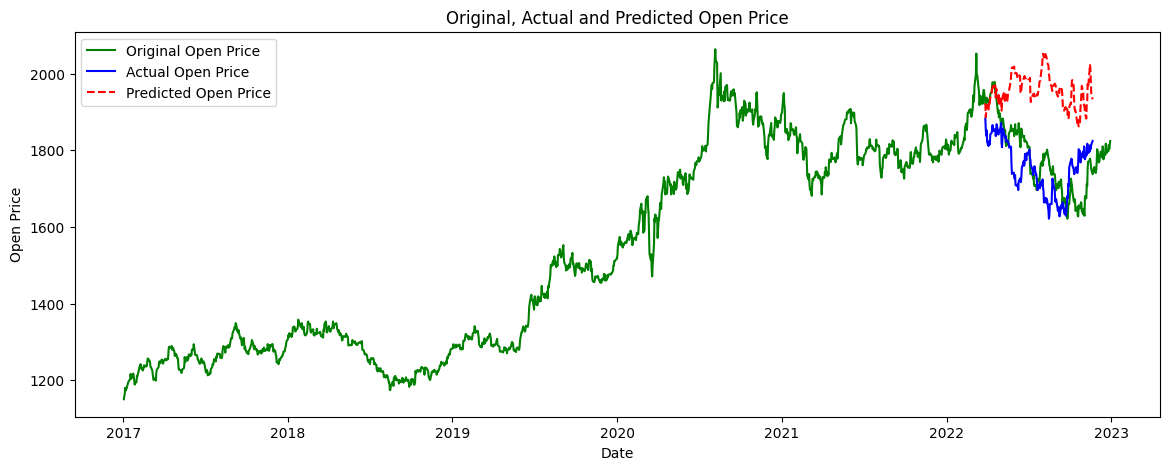

In [65]:
# generate array filled with means for testY
mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)

# substitute testY into the first column
mean_values_testY[:, 0] = np.squeeze(testY)

# inverse transform
testY_original = scaler.inverse_transform(mean_values_testY)[:,0]
print(testY_original.shape)

# plotting
plt.figure(figsize=(14, 5))

# plot original 'Open' prices
plt.plot(dates, original_open, color='green', label='Original Open Price')

# plot actual vs predicted
plt.plot(test_dates[seq_len:-29], testY_original, color='blue', label='Actual Open Price')
plt.plot(test_dates[seq_len:-29], y_pred, color='red', linestyle='--', label='Predicted Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Original, Actual and Predicted Open Price')
plt.legend()
plt.show()



In [66]:
len(test_dates)

260

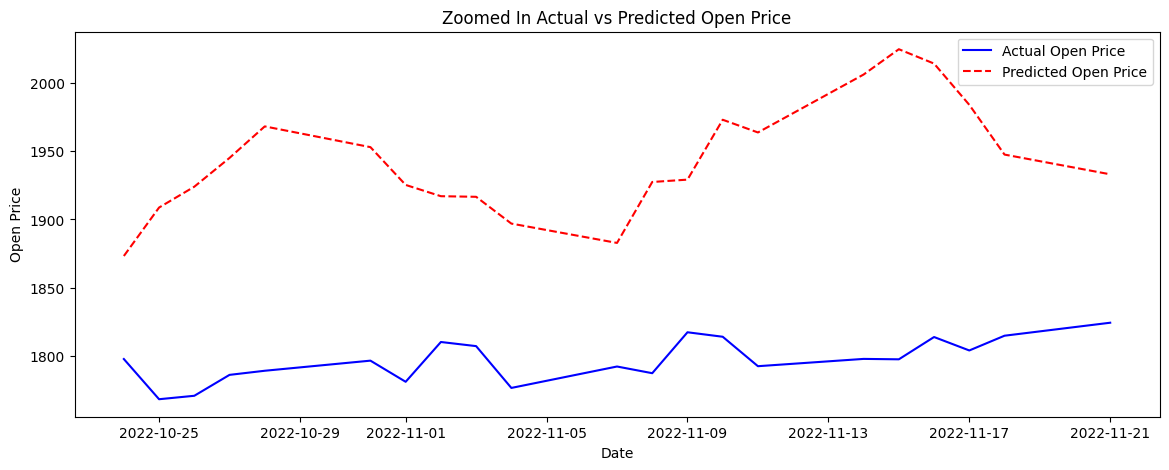

In [67]:
# Calculate the start and end indices for the zoomed plot
zoom_start = len(test_dates) - 50
zoom_end = len(test_dates)

# Create the zoomed plot
plt.figure(figsize=(14, 5))

# Adjust the start index for the testY_original and y_pred arrays
adjusted_start = zoom_start - seq_len

plt.plot(test_dates[zoom_start:zoom_end-29],
         testY_original[adjusted_start:zoom_end - zoom_start + adjusted_start],
         color='blue',
         label='Actual Open Price')

plt.plot(test_dates[zoom_start:zoom_end-29],
         y_pred[adjusted_start:zoom_end - zoom_start + adjusted_start ],
         color='red',
         linestyle='--',
         label='Predicted Open Price')

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Zoomed In Actual vs Predicted Open Price')
plt.legend()
plt.show()

In [68]:
 len(testY_original[adjusted_start:zoom_end - zoom_start + adjusted_start])

21

#XGB

In [70]:
train

,날짜,종가_gold,시가,고가,저가,변동 %,종가_PH_gold,종가_nem,종가_nasdaq,종가_silver,ATR,Parabolic SAR,MACD,SMA,EMA,RSI
0,2017-01-02,1150.52,1150.55,1152.66,1149.66,-0.12,82.01,33.79,5429.08,16.409,0.000000,1152.660000,0.000000,1150.520000,1150.520000,100.000000
1,2017-01-03,1158.91,1150.80,1163.61,1145.77,0.73,82.01,33.79,5429.08,16.409,0.000000,1152.660000,0.669288,1154.715000,1151.810769,100.000000
2,2017-01-04,1163.80,1159.28,1168.23,1156.35,0.42,83.39,34.11,5477.01,16.552,0.000000,1152.660000,1.576117,1157.743333,1153.655266,100.000000
3,2017-01-05,1180.48,1163.67,1184.99,1162.38,1.43,87.93,35.68,5487.94,16.637,0.000000,1152.660000,3.599232,1163.427500,1157.782148,100.000000
4,2017-01-06,1172.81,1180.38,1181.49,1170.37,-0.65,85.31,34.56,5521.06,16.519,0.000000,1152.660000,4.531425,1165.304000,1160.094126,77.502352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,2020-12-25,1875.82,1877.07,1877.07,1877.07,-0.04,142.34,59.82,12899.42,26.539,25.140132,1858.734108,4.855297,1862.156667,1865.043395,54.785004
1037,2020-12-28,1871.19,1885.93,1900.53,1869.21,-0.25,142.34,59.82,12899.42,26.539,25.581551,1858.734108,4.985973,1865.146667,1865.989026,53.264657
1038,2020-12-29,1877.99,1872.24,1886.91,1870.99,0.36,142.46,59.73,12850.22,26.217,24.891441,1858.734108,5.573984,1868.393333,1867.835330,55.229750
1039,2020-12-30,1893.37,1878.34,1894.06,1875.66,0.82,147.14,60.39,12870.00,26.573,24.427766,1858.734108,7.198050,1873.910000,1871.763741,59.388988


In [71]:
gold_End=np.array(train["종가_gold"])
open=np.array(train["시가"])
high=np.array(train["고가"])
low=np.array(train["저가"])
variance=np.array(train["변동 %"])
ph_gold=np.array(train["종가_PH_gold"])
nem=np.array(train["종가_nem"])
nas=np.array(train["종가_nasdaq"])
silver=np.array(train["종가_silver"])
atr=np.array(train["ATR"])
parabolic=np.array(train["Parabolic SAR"])
macd=np.array(train["MACD"])
sma=np.array(train["SMA"])
ema=np.array(train["EMA"])
rsi=np.array(train["RSI"])

In [72]:
input=np.column_stack((open,high,low,variance,ph_gold,nem,nas,silver,atr,parabolic,macd,sma,ema,rsi))
output=gold_End

In [73]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
input_scaled=SS.fit_transform(input)

In [74]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(input_scaled,output)

In [75]:
from xgboost import XGBClassifier, plot_importance

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_output = le.fit_transform(train_output)

from xgboost import XGBClassifier
XGB= XGBClassifier()
XGB.fit(train_input,train_output)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [90]:
np.corrcoef(XGB.predict(test_input),test_output)

array([[1.       , 0.9134635],
       [0.9134635, 1.       ]])